In [10]:
from shift_stack_moons.shift_stack_moons import shift_and_stack
#from shift_stack_moons import shift_and_stack
import numpy as np
import matplotlib.pyplot as plt
import os
from astroquery.jplhorizons import Horizons

In [11]:
# find filenames
data_dir = '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/'
data_files = os.listdir(data_dir)
stem = 'urh'
obscode = '568' #Keck JPL Horizons obs code
code = 'Puck'
date = '2019-11-04'
tstart = date+' 00:00'
tend = date+' 23:59'
perturbation_experiment = False
outfname = f"{stem}_{code}_{date}.fits"
fnames = [data_dir+s for s in data_files if s.startswith(stem)]
#print(fnames)

['/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh193.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh185.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh127.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh189.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh131.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh96.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh97.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh130.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh188.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh126.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh184.fits', '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh192.fits', '/Users/emolter/research/keck

In [12]:
## get ephemeris from Horizons. quantity 6 is the satellite relative position to parent in arcsec
horizons_obj = Horizons(
    id=code,
    location=obscode,
    epochs={"start": tstart, "stop": tend, "step": "1m"},
)
ephem = horizons_obj.ephemerides(quantities=6) #.to_pandas()
#ephem = ephem.set_index(pd.DatetimeIndex(ephem["datetime_str"]))

In [13]:
fits_out = shift_and_stack(fnames, ephem, pixscale=0.009971, difference=True, edge_detect=False, diagnostic_plots=False)
fits_out.write(outfname)

Processing file 1 out of 56
2019-11-04 09:53:47
Processing file 2 out of 56
2019-11-04 09:33:03
Processing file 3 out of 56
2019-11-04 07:01:24
Processing file 4 out of 56
2019-11-04 09:43:47
Processing file 5 out of 56
2019-11-04 07:08:42
Processing file 6 out of 56
2019-11-04 05:42:11
Processing file 7 out of 56
2019-11-04 05:44:37
Processing file 8 out of 56
2019-11-04 07:08:42
Processing file 9 out of 56
2019-11-04 09:41:21
Processing file 10 out of 56
2019-11-04 06:58:53
Processing file 11 out of 56
2019-11-04 09:30:37
Processing file 12 out of 56
2019-11-04 09:51:21
Processing file 13 out of 56
2019-11-04 06:45:12
Processing file 14 out of 56
2019-11-04 05:16:42
Processing file 15 out of 56
2019-11-04 05:26:30
Processing file 16 out of 56
2019-11-04 06:35:28
Processing file 17 out of 56
2019-11-04 08:17:22
Processing file 18 out of 56
2019-11-04 09:28:11
Processing file 19 out of 56
2019-11-04 09:25:45
Processing file 20 out of 56
2019-11-04 09:56:13
Processing file 21 out of 56


Creates file urh_Puck_2019-11-04.fits

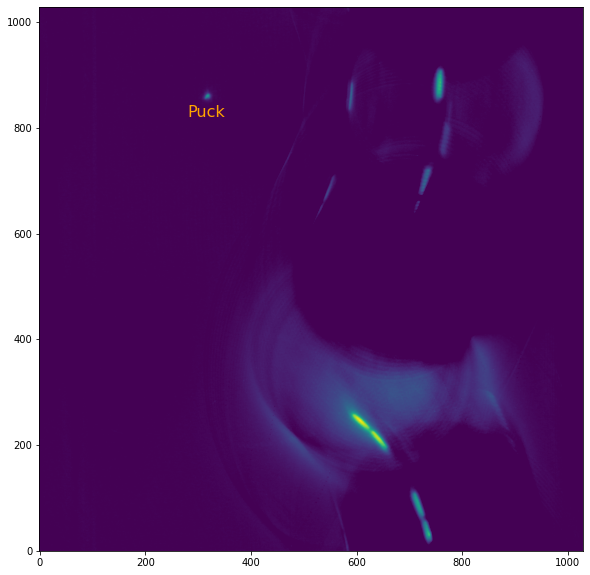

In [25]:
# Visualize the output
from astropy.io import fits

stacked_data = fits.open('urh_Puck_2019-11-04.fits')[0].data
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(stacked_data, origin='lower', vmin=0)
ax.text(280, 820, 'Puck', color='orange', fontsize=16)
plt.show()